# model GB2

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
##### function that reads the value of the total contribution in a determined line
def read_value(line):
    return float(line.split('|')[-1].split('+/-')[0])

def protonation(line):
    line_t = line
    line_t = line_t.replace('HID', 'HIS')
    line_t = line_t.replace('HIE', 'HIS')
    line_t = line_t.replace('HIP', 'HIS')
    line_t = line_t.replace('ASH', 'ASP')
    line_t = line_t.replace('GLH', 'GLU')
    line_t = line_t.replace('CYX', 'CYS')
    return line_t


#### function to find the contribution of a determined residue 
def value_finder(residue, file):
    # this will return the first line where the residue show up
    for line in file:
        if residue in protonation(line):
            return read_value(line)
    

In [3]:
### fixing the residue numbers
def res_shift(residue, shift):
    o_res = str(int(residue.split(' ')[-1]))
    s_res = str(int(residue.split(' ')[-1]) + shift)
    res = residue.replace(o_res,s_res)
    return res

### changing from three letters to one letter code
def tlc2olc(resname):
    dic = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
           'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
           'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
           'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
          }
    restype = resname.split(' ')[0]
    resnumber = resname.split(' ')[-1]
    return dic[restype] + resnumber
tlc2olc('HIS 42')   

'H42'

In [4]:
file1 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file2 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file3 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file4 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_BG_r0_gb2 = file1.readlines()
il2HAR_BG_r1_gb2 = file2.readlines()
il2IAR_BG_r0_gb2 = file3.readlines()
il2IAR_BG_r1_gb2 = file4.readlines()

In [5]:
file5 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/il2-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file6 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/il2-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file7 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/il2-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file8 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/il2-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_IL2B_r0_gb2 = file5.readlines()
il2HAR_IL2B_r1_gb2 = file6.readlines()
il2IAR_IL2B_r0_gb2 = file7.readlines()
il2IAR_IL2B_r1_gb2 = file8.readlines()

In [6]:
file9 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive/analysis/MMGBSA_amber_19/il2-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file10 = open('../IL2-HAR_IAR_COMPLEXES/IL2-HAR/productive_r1/analysis/MMGBSA_amber_19/il2-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file11 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive/analysis/MMGBSA_amber_19/il2-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file12 = open('../IL2-HAR_IAR_COMPLEXES/IL2-IAR/productive_r1/analysis/MMGBSA_amber_19/il2-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il2HAR_IL2G_r0_gb2 = file9.readlines()
il2HAR_IL2G_r1_gb2 = file10.readlines()
il2IAR_IL2G_r0_gb2 = file11.readlines()
il2IAR_IL2G_r1_gb2 = file12.readlines()

In [7]:
file13 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file14 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file15 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file16 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/beta-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_BG_r0_gb2 = file13.readlines()
il15HAR_BG_r1_gb2 = file14.readlines()
il15IAR_BG_r0_gb2 = file15.readlines()
il15IAR_BG_r1_gb2 = file16.readlines()

In [8]:
file17 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/il15-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file18 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/il15-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file19 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/il15-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file20 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/il15-beta_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_IL15B_r0_gb2 = file17.readlines()
il15HAR_IL15B_r1_gb2 = file18.readlines()
il15IAR_IL15B_r0_gb2 = file19.readlines()
il15IAR_IL15B_r1_gb2 = file20.readlines()

In [9]:
file21 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive/analysis/MMGBSA_amber_19/il15-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file22 = open('../IL15-HAR_IAR_COMPLEXES/IL15-HAR/productive_r1/analysis/MMGBSA_amber_19/il15-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file23 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive/analysis/MMGBSA_amber_19/il15-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')
file24 = open('../IL15-HAR_IAR_COMPLEXES/IL15-IAR/productive_r1/analysis/MMGBSA_amber_19/il15-gamma_gb2/per_residue/FINAL_DECOMP_MMPBSA.dat','r')

il15HAR_IL15G_r0_gb2 = file21.readlines()
il15HAR_IL15G_r1_gb2 = file22.readlines()
il15IAR_IL15G_r0_gb2 = file23.readlines()
il15IAR_IL15G_r1_gb2 = file24.readlines()

In [10]:
B2G = ['ARG 132', 'HIS 133', 'LEU 134', 'GLU 135', 'LEU 153', 'THR 154', 'LEU 155', 
                 'LYS 156', 'GLN 157', 'GLN 159', 'TRP 161', 'LEU 164', 'GLU 165', 
                 'THR 166', 'LEU 182']
G2B = ['LEU 112', 'GLN 116', 'GLU 131', 'GLN 147', 'VAL 149', 'ASP 150', 'TYR 151',
                 'ARG 152', 'PHE 155', 'SER 156', 'PRO 158', 'SER 159', 'LYS 154', 
                 'TYR 166', 'PRO 176']


IL22B = ['LEU  10', 'GLN  11', 'GLU  13', 'HIS  14', 'LEU  17', 'ASP  18', 'MET  21',
                 'ARG  79', 'ASP  82', 'LEU  83', 'ASN  86', 'VAL  89', 'ILE  90', 
                 'LEU  92', 'GLU  93']
B2IL2 = ['ARG  10', 'ARG  36', 'ASP  63', 'SER  64', 'GLN  65', 'THR  68', 'THR  69', 
                 'VAL  70', 'LYS  94', 'HIS 128', 'TYR 129', 'HIS 133']


IL22G = ['LEU  16', 'LYS  47', 'GLU 108', 'THR 121', 'GLN 124', 'SER 125', 'ILE 127', 
                 'SER 128', 'THR 131']
G2IL2 = ['LYS  39', 'ASN  40', 'TYR  72', 'LYS  94', 'TYR 151', 'PRO 176', 'LEU 177']


IL152B = ['ASP  10', 'ASP  58', 'ASP  63', 'GLU  66', 'ASN  67', 'ILE  70', 'LEU  71']
B2IL15 = ['ARG  36', 'ARG  37', 'ARG  38', 'SER  64', 'THR  68', 'THR  69', 'VAL  70', 
                'ASP  71', 'HIS 128', 'TYR 129']


IL152G = ['VAL   5', 'ILE   8', 'GLU  30', 'SER  31', 'ASP  32', 'VAL  33', 'HIS  34', 
                'PRO  35', 'HIS 107', 'GLN 110', 'MET 111', 'ILE 113']
G2IL15 = ['LYS  39', 'ASN  40', 'SER  41', 'GLN  73', 'THR  74', 'LYS  94', 'GLN  96', 
          'PRO 176', 'LEU 177', 'CYS 178', 'SER 180']

# B2G

In [11]:
B2G_il2har_r0_gb2 = []
B2G_il2har_r1_gb2 = []
B2G_il2iar_r0_gb2 = []
B2G_il2iar_r1_gb2 = []

G2B_il2har_r0_gb2 = []
G2B_il2har_r1_gb2 = []
G2B_il2iar_r0_gb2 = []
G2B_il2iar_r1_gb2 = []


for res in B2G:
    B2G_il2har_r0_gb2.append(value_finder(res, il2HAR_BG_r0_gb2))
    B2G_il2har_r1_gb2.append(value_finder(res, il2HAR_BG_r1_gb2))
    B2G_il2iar_r0_gb2.append(value_finder(res, il2IAR_BG_r0_gb2))
    B2G_il2iar_r1_gb2.append(value_finder(res, il2IAR_BG_r1_gb2))
    
for res in G2B:
    G2B_il2har_r0_gb2.append(value_finder(res, il2HAR_BG_r0_gb2))
    G2B_il2har_r1_gb2.append(value_finder(res, il2HAR_BG_r1_gb2))
    G2B_il2iar_r0_gb2.append(value_finder(res, il2IAR_BG_r0_gb2))
    G2B_il2iar_r1_gb2.append(value_finder(res, il2IAR_BG_r1_gb2))
    
    
B2G_H_gb2 = list(np.transpose([B2G_il2har_r0_gb2, B2G_il2har_r1_gb2]))
B2G_I_gb2 = list(np.transpose([B2G_il2iar_r0_gb2, B2G_il2iar_r1_gb2]))

G2B_H_gb2 = list(np.transpose([G2B_il2har_r0_gb2, G2B_il2har_r1_gb2]))
G2B_I_gb2 = list(np.transpose([G2B_il2iar_r0_gb2, G2B_il2iar_r1_gb2]))

In [12]:
IL22B_il2har_r0_gb2 = []
IL22B_il2har_r1_gb2 = []
IL22B_il2iar_r0_gb2 = []
IL22B_il2iar_r1_gb2 = []

B2IL2_il2har_r0_gb2 = []
B2IL2_il2har_r1_gb2 = []
B2IL2_il2iar_r0_gb2 = []
B2IL2_il2iar_r1_gb2 = []


for res in IL22B:
    IL22B_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2B_r0_gb2))
    IL22B_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2B_r1_gb2))
    IL22B_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2B_r0_gb2))
    IL22B_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2B_r1_gb2))
    
for res in B2IL2:
    B2IL2_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2B_r0_gb2))
    B2IL2_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2B_r1_gb2))
    B2IL2_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2B_r0_gb2))
    B2IL2_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2B_r1_gb2))
    
    
IL22B_H_gb2 = list(np.transpose([IL22B_il2har_r0_gb2, IL22B_il2har_r1_gb2]))
IL22B_I_gb2 = list(np.transpose([IL22B_il2iar_r0_gb2, IL22B_il2iar_r1_gb2]))

B2IL2_H_gb2 = list(np.transpose([B2IL2_il2har_r0_gb2, B2IL2_il2har_r1_gb2]))
B2IL2_I_gb2 = list(np.transpose([B2IL2_il2iar_r0_gb2, B2IL2_il2iar_r1_gb2]))

In [13]:
IL22G_il2har_r0_gb2 = []
IL22G_il2har_r1_gb2 = []
IL22G_il2iar_r0_gb2 = []
IL22G_il2iar_r1_gb2 = []

G2IL2_il2har_r0_gb2 = []
G2IL2_il2har_r1_gb2 = []
G2IL2_il2iar_r0_gb2 = []
G2IL2_il2iar_r1_gb2 = []


for res in IL22G:
    IL22G_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2G_r0_gb2))
    IL22G_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2G_r1_gb2))
    IL22G_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2G_r0_gb2))
    IL22G_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2G_r1_gb2))
    
for res in G2IL2:
    G2IL2_il2har_r0_gb2.append(value_finder(res, il2HAR_IL2G_r0_gb2))
    G2IL2_il2har_r1_gb2.append(value_finder(res, il2HAR_IL2G_r1_gb2))
    G2IL2_il2iar_r0_gb2.append(value_finder(res, il2IAR_IL2G_r0_gb2))
    G2IL2_il2iar_r1_gb2.append(value_finder(res, il2IAR_IL2G_r1_gb2))
    
    
IL22G_H_gb2 = list(np.transpose([IL22G_il2har_r0_gb2, IL22G_il2har_r1_gb2]))
IL22G_I_gb2 = list(np.transpose([IL22G_il2iar_r0_gb2, IL22G_il2iar_r1_gb2]))

G2IL2_H_gb2 = list(np.transpose([G2IL2_il2har_r0_gb2, G2IL2_il2har_r1_gb2]))
G2IL2_I_gb2 = list(np.transpose([G2IL2_il2iar_r0_gb2, G2IL2_il2iar_r1_gb2]))

In [14]:
B2G_il15har_r0_gb2 = []
B2G_il15har_r1_gb2 = []
B2G_il15iar_r0_gb2 = []
B2G_il15iar_r1_gb2 = []

G2B_il15har_r0_gb2 = []
G2B_il15har_r1_gb2 = []
G2B_il15iar_r0_gb2 = []
G2B_il15iar_r1_gb2 = []


for res in B2G:
    B2G_il15har_r0_gb2.append(value_finder(res, il15HAR_BG_r0_gb2))
    B2G_il15har_r1_gb2.append(value_finder(res, il15HAR_BG_r1_gb2))
    B2G_il15iar_r0_gb2.append(value_finder(res, il15IAR_BG_r0_gb2))
    B2G_il15iar_r1_gb2.append(value_finder(res, il15IAR_BG_r1_gb2))
    
for res in G2B:
    G2B_il15har_r0_gb2.append(value_finder(res, il15HAR_BG_r0_gb2))
    G2B_il15har_r1_gb2.append(value_finder(res, il15HAR_BG_r1_gb2))
    G2B_il15iar_r0_gb2.append(value_finder(res, il15IAR_BG_r0_gb2))
    G2B_il15iar_r1_gb2.append(value_finder(res, il15IAR_BG_r1_gb2))
    
    
B2G_H15_gb2 = list(np.transpose([B2G_il15har_r0_gb2, B2G_il15har_r1_gb2]))
B2G_I15_gb2 = list(np.transpose([B2G_il15iar_r0_gb2, B2G_il15iar_r1_gb2]))

G2B_H15_gb2 = list(np.transpose([G2B_il15har_r0_gb2, G2B_il15har_r1_gb2]))
G2B_I15_gb2 = list(np.transpose([G2B_il15iar_r0_gb2, G2B_il15iar_r1_gb2]))

In [15]:
IL152B_il15har_r0_gb2 = []
IL152B_il15har_r1_gb2 = []
IL152B_il15iar_r0_gb2 = []
IL152B_il15iar_r1_gb2 = []

B2IL15_il15har_r0_gb2 = []
B2IL15_il15har_r1_gb2 = []
B2IL15_il15iar_r0_gb2 = []
B2IL15_il15iar_r1_gb2 = []


for res in IL152B:
    IL152B_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15B_r0_gb2))
    IL152B_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15B_r1_gb2))
    IL152B_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15B_r0_gb2))
    IL152B_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15B_r1_gb2))
    
for res in B2IL15:
    B2IL15_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15B_r0_gb2))
    B2IL15_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15B_r1_gb2))
    B2IL15_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15B_r0_gb2))
    B2IL15_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15B_r1_gb2))
    
    
IL152B_H_gb2 = list(np.transpose([IL152B_il15har_r0_gb2, IL152B_il15har_r1_gb2]))
IL152B_I_gb2 = list(np.transpose([IL152B_il15iar_r0_gb2, IL152B_il15iar_r1_gb2]))

B2IL15_H_gb2 = list(np.transpose([B2IL15_il15har_r0_gb2, B2IL15_il15har_r1_gb2]))
B2IL15_I_gb2 = list(np.transpose([B2IL15_il15iar_r0_gb2, B2IL15_il15iar_r1_gb2]))

In [16]:
IL152G_il15har_r0_gb2 = []
IL152G_il15har_r1_gb2 = []
IL152G_il15iar_r0_gb2 = []
IL152G_il15iar_r1_gb2 = []

G2IL15_il15har_r0_gb2 = []
G2IL15_il15har_r1_gb2 = []
G2IL15_il15iar_r0_gb2 = []
G2IL15_il15iar_r1_gb2 = []


for res in IL152G:
    IL152G_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15G_r0_gb2))
    IL152G_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15G_r1_gb2))
    IL152G_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15G_r0_gb2))
    IL152G_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15G_r1_gb2))
    
for res in G2IL15:
    G2IL15_il15har_r0_gb2.append(value_finder(res, il15HAR_IL15G_r0_gb2))
    G2IL15_il15har_r1_gb2.append(value_finder(res, il15HAR_IL15G_r1_gb2))
    G2IL15_il15iar_r0_gb2.append(value_finder(res, il15IAR_IL15G_r0_gb2))
    G2IL15_il15iar_r1_gb2.append(value_finder(res, il15IAR_IL15G_r1_gb2))
    
    
IL152G_H_gb2 = list(np.transpose([IL152G_il15har_r0_gb2, IL152G_il15har_r1_gb2]))
IL152G_I_gb2 = list(np.transpose([IL152G_il15iar_r0_gb2, IL152G_il15iar_r1_gb2]))

G2IL15_H_gb2 = list(np.transpose([G2IL15_il15har_r0_gb2, G2IL15_il15har_r1_gb2]))
G2IL15_I_gb2 = list(np.transpose([G2IL15_il15iar_r0_gb2, G2IL15_il15iar_r1_gb2]))

In [17]:
IL152G_H_gb2

[array([-1.139, -1.1  ]),
 array([-1.715, -1.48 ]),
 array([0.543, 0.451]),
 array([-1.195, -0.431]),
 array([-2.052, -5.669]),
 array([-2.165, -2.152]),
 array([-3.247, -2.931]),
 array([-3.136, -1.346]),
 array([-2.826, -1.556]),
 array([-7.251, -5.621]),
 array([-3.306, -2.581]),
 array([-2.686, -2.76 ])]

In [18]:
for i in range(len(B2G)):
    B2G[i] = tlc2olc(res_shift(B2G[i], 5))
    
for i in range(len(G2B)):
    G2B[i] = tlc2olc(res_shift(G2B[i], 31))
    
for i in range(len(IL22B)):
    IL22B[i] = tlc2olc(res_shift(IL22B[i], 2))
    
for i in range(len(B2IL2)):
    B2IL2[i] = tlc2olc(res_shift(B2IL2[i], 5))
    
for i in range(len(IL22G)):
    IL22G[i] = tlc2olc(res_shift(IL22G[i], 2))
    
for i in range(len(G2IL2)):
    G2IL2[i] = tlc2olc(res_shift(G2IL2[i], 31))
    
for i in range(len(B2IL15)):
    B2IL15[i] = tlc2olc(res_shift(B2IL15[i], 5))
    
for i in range(len(IL152B)):
    IL152B[i] = tlc2olc(res_shift(IL152B[i], -2))
    
for i in range(len(IL152G)):
    IL152G[i] = tlc2olc(res_shift(IL152G[i], -2))
    
for i in range(len(G2IL15)):
    G2IL15[i] = tlc2olc(res_shift(G2IL15[i], 31))

In [19]:
def plot_comps(data1, data2, names, name):
    pos_data1 = np.arange(0,2*len(data1),2)
    pos_data2 = np.arange(0.7,2*len(data2)+0.7,2)
    pos_labels = pos_data1 + 0.35
    fig = plt.figure(figsize = (7,2.5))
    pl1 = plt.boxplot(data1, positions = pos_data1, patch_artist = True, 
                      medianprops = dict(color = 'red'),
                      flierprops = dict(color = 'red'),
                      capprops = dict(color = 'red'),
                      whiskerprops = dict(color = 'red')
                     )
    for box in pl1['boxes']:
        box.set(color = 'red', facecolor = 'red', linewidth = 2)
    pl2 = plt.boxplot(data2, positions = pos_data2, patch_artist = True,
                      medianprops = dict(color = 'blue'),
                      flierprops = dict(color = 'blue'),
                      capprops = dict(color = 'blue'),
                      whiskerprops = dict(color = 'blue')                      
                     )
    for box in pl2['boxes']:
        box.set(color = 'blue', facecolor = 'blue', linewidth = 2)
    plt.xticks(pos_labels,names, rotation = 80)
    plt.grid(False)
    plt.tight_layout()
    savefig(name +'.pdf')
    plt.show()

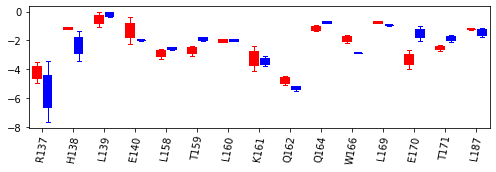

In [20]:
plot_comps(B2G_H_gb2, B2G_I_gb2, B2G, 'beta2gamma_gb2')

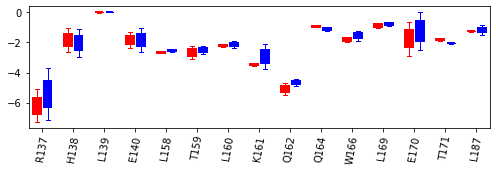

In [21]:
plot_comps(B2G_H15_gb2, B2G_I15_gb2, B2G, 'beta2gamma15_gb2')

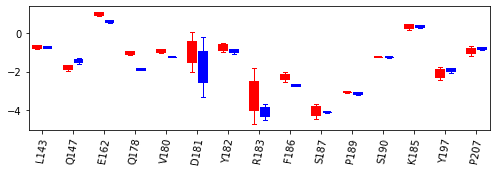

In [22]:
plot_comps(G2B_H_gb2, G2B_I_gb2, G2B, 'gamma2beta_gb2')

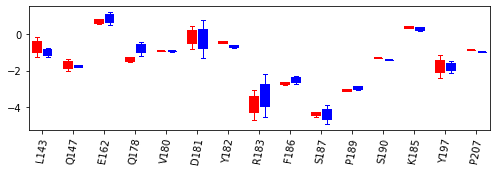

In [23]:
plot_comps(G2B_H15_gb2, G2B_I15_gb2, G2B, 'gamma2beta15_gb2')

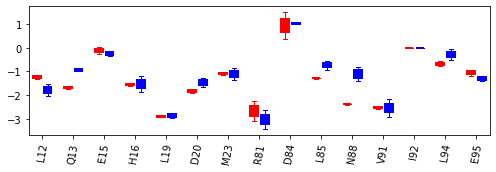

In [24]:
plot_comps(IL22B_H_gb2, IL22B_I_gb2, IL22B, 'il22beta_gb2')

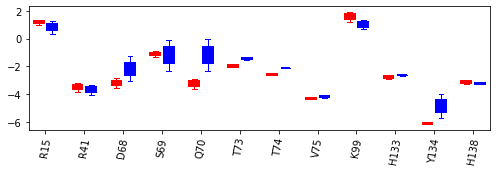

In [25]:
plot_comps(B2IL2_H_gb2, B2IL2_I_gb2, B2IL2, 'beta2il2_gb2')

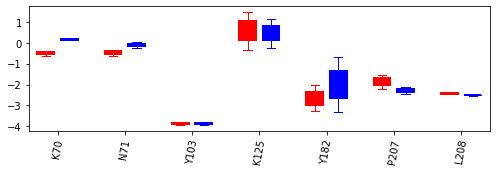

In [26]:
plot_comps(G2IL2_H_gb2, G2IL2_I_gb2, G2IL2, 'gamma2il2_gb2')

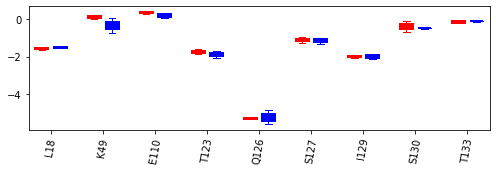

In [27]:
plot_comps(IL22G_H_gb2, IL22G_I_gb2, IL22G, 'il22gamma_gb2')

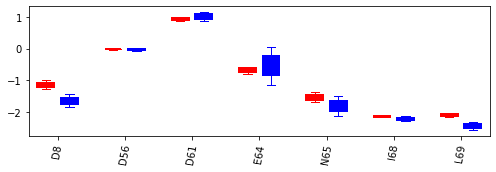

In [28]:
plot_comps(IL152B_H_gb2, IL152B_I_gb2, IL152B, 'il152beta_gb2')

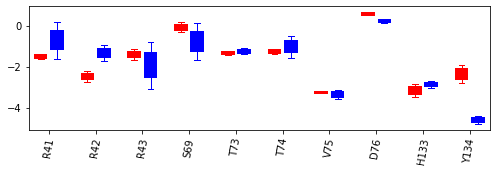

In [29]:
plot_comps(B2IL15_H_gb2, B2IL15_I_gb2, B2IL15, 'beta2il15_gb2')

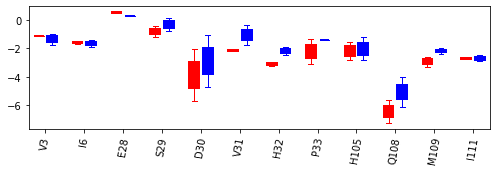

In [30]:
plot_comps(IL152G_H_gb2, IL152G_I_gb2, IL152G, 'il152gamma_gb2')

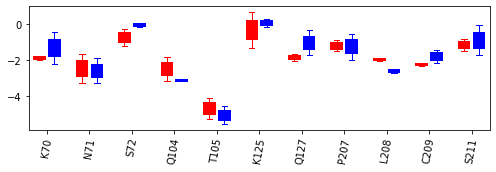

In [31]:
plot_comps(G2IL15_H_gb2, G2IL15_I_gb2, G2IL15, 'gamma2il15_gb2')